In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

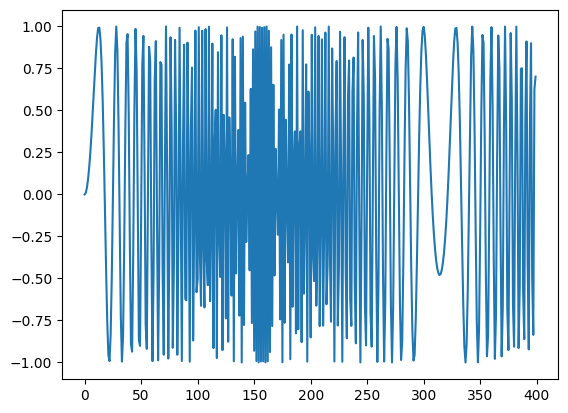

In [10]:
#Make the original data
N = 400
series = np.sin((0.1*np.arange(N))**2)

#plot it
plt.plot(series)
plt.show()

In [11]:
#Build dataset
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print(f"Y Shape: {Y.shape}, X Shape: {X.shape}")

Y Shape: (390, 1), X Shape: (390, 10)


In [12]:
#Try autoregressive model
model = nn.Linear(T, 1)

In [13]:
#Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [14]:
#Make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [15]:
#Training
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):

  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it+1) % 5 == 0:
      print(f'Epoch {it+1}/{epochs}, Train_loss: {loss.item():.4f}, Test_loss: {test_loss.item():.4f}')
  return train_losses, test_losses


In [16]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test)

Epoch 5/200, Train_loss: 0.5594, Test_loss: 0.6782
Epoch 10/200, Train_loss: 0.5250, Test_loss: 0.6726
Epoch 15/200, Train_loss: 0.5103, Test_loss: 0.6321
Epoch 20/200, Train_loss: 0.5015, Test_loss: 0.5947
Epoch 25/200, Train_loss: 0.4916, Test_loss: 0.5837
Epoch 30/200, Train_loss: 0.4884, Test_loss: 0.5864
Epoch 35/200, Train_loss: 0.4888, Test_loss: 0.5958
Epoch 40/200, Train_loss: 0.4840, Test_loss: 0.5955
Epoch 45/200, Train_loss: 0.4851, Test_loss: 0.5930
Epoch 50/200, Train_loss: 0.4842, Test_loss: 0.5867
Epoch 55/200, Train_loss: 0.4837, Test_loss: 0.5893
Epoch 60/200, Train_loss: 0.4837, Test_loss: 0.5938
Epoch 65/200, Train_loss: 0.4834, Test_loss: 0.5870
Epoch 70/200, Train_loss: 0.4835, Test_loss: 0.5884
Epoch 75/200, Train_loss: 0.4834, Test_loss: 0.5934
Epoch 80/200, Train_loss: 0.4833, Test_loss: 0.5885
Epoch 85/200, Train_loss: 0.4833, Test_loss: 0.5884
Epoch 90/200, Train_loss: 0.4833, Test_loss: 0.5906
Epoch 95/200, Train_loss: 0.4833, Test_loss: 0.5900
Epoch 100/200

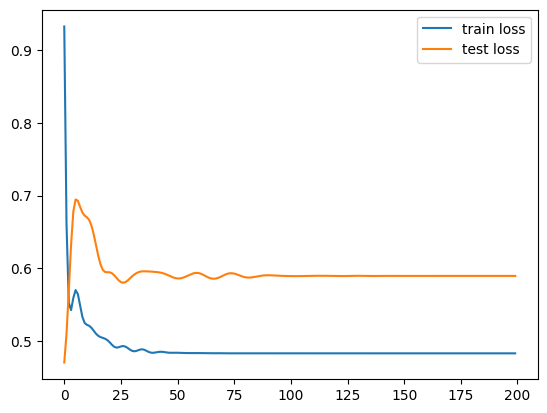

In [17]:
#Plot th train loss and test loss per iteration
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [18]:
#Wrong forecast using targets
validation_target = Y[-N//2:]
validation_predictions = []
with torch.no_grad():
  validation_predictions = model(X_test).numpy()

# i = 0
# while len(validation_predictions) < len(validation_target):
#   input_ = X_test[i].view(1, T, 1)
#   p = model(input_)[0, 0].item()
#   i +=1
#   validation_predictions.append(p)

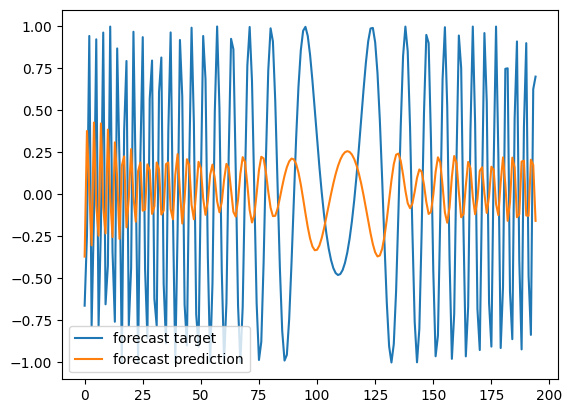

In [19]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [20]:
#Forecast future values
validation_target = Y[-N//2: ]
validation_predictions = []

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.reshape(1, -1)
  p = model(input_)

  validation_predictions.append(p[0, 0].item())
  #Make the new input
  last_x = torch.cat((last_x[1:], p[0]))

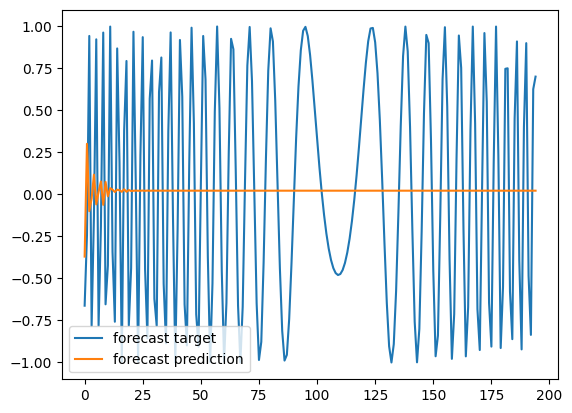

In [21]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()